In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/ML_datasets/data.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Age,Gender,Education,Income,Debt,Credit_Score,Loan_Amount,Loan_Term,Num_Credit_Cards,Payment_History,Employment_Status,Residence_Type,Marital_Status,Creditworthiness
0,56,Female,Master,149406,34089,581,49200,60,4,Bad,Unemployed,Rented,Single,1
1,69,Female,High School,78896,8626,648,20147,24,7,Good,Employed,Mortgaged,Married,1
2,46,Female,Master,119339,46281,329,41307,12,8,Bad,Unemployed,Owned,Single,1
3,32,Male,High School,131067,29403,816,19019,60,8,Bad,Employed,Owned,Single,1
4,60,Male,PhD,38001,30032,673,16317,36,4,Average,Employed,Rented,Married,0


In [ ]:
df.describe()

,Age,Income,Debt,Credit_Score,Loan_Amount,Loan_Term,Num_Credit_Cards,Creditworthiness
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,43.489250,85222.009417,25354.673250,573.967583,25113.951250,35.943000,4.985833,0.702583
std,14.908982,37640.043409,14087.390846,157.816052,14247.092051,16.965162,2.593458,0.457140
min,18.000000,20026.000000,1001.000000,300.000000,501.000000,12.000000,1.000000,0.000000
25%,31.000000,52400.750000,13161.000000,437.000000,12725.000000,24.000000,3.000000,0.000000
50%,43.000000,85756.000000,25382.500000,574.000000,25220.500000,36.000000,5.000000,1.000000
75%,56.000000,117754.750000,37497.500000,709.000000,37348.000000,48.000000,7.000000,1.000000
max,69.000000,149984.000000,49995.000000,849.000000,49996.000000,60.000000,9.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                12000 non-null  int64 
 1   Gender             12000 non-null  object
 2   Education          12000 non-null  object
 3   Income             12000 non-null  int64 
 4   Debt               12000 non-null  int64 
 5   Credit_Score       12000 non-null  int64 
 6   Loan_Amount        12000 non-null  int64 
 7   Loan_Term          12000 non-null  int64 
 8   Num_Credit_Cards   12000 non-null  int64 
 9   Payment_History    12000 non-null  object
 10  Employment_Status  12000 non-null  object
 11  Residence_Type     12000 non-null  object
 12  Marital_Status     12000 non-null  object
 13  Creditworthiness   12000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.3+ MB


In [ ]:
df.shape

(12000, 14)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education', 'Income', 'Debt', 'Credit_Score',
       'Loan_Amount', 'Loan_Term', 'Num_Credit_Cards', 'Payment_History',
       'Employment_Status', 'Residence_Type', 'Marital_Status',
       'Creditworthiness'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, drop_first=True)

**1. Logistic Algorithm**

In [ ]:
# Separate features and target variable
X = df.drop('Creditworthiness', axis=1)  # Replace 'Creditworthiness' with the actual target column name
y = df['Creditworthiness']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000, class_weight='balanced')

In [ ]:
X_train

,Age,Income,Debt,Credit_Score,Loan_Amount,Loan_Term,Num_Credit_Cards,Gender_Male,Education_High School,Education_Master,Education_PhD,Payment_History_Bad,Payment_History_Good,Employment_Status_Self-Employed,Employment_Status_Unemployed,Residence_Type_Owned,Residence_Type_Rented,Marital_Status_Married,Marital_Status_Single
9182,58,95691,48378,574,47591,60,7,True,False,False,False,False,False,False,True,False,False,False,False
11091,43,98840,49187,587,24481,36,7,False,False,True,False,True,False,False,False,False,False,False,True
6428,44,115490,14608,362,37319,12,3,True,False,True,False,False,True,False,False,False,True,True,False
288,24,84366,5713,741,31081,48,9,True,False,False,False,True,False,False,True,False,False,False,True
2626,46,58829,9359,504,1472,36,2,False,True,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,36,83402,49145,697,34651,48,9,True,False,False,False,True,False,True,False,True,False,True,False
5191,49,111392,36195,770,19187,60,5,True,True,False,False,True,False,True,False,True,False,True,False
5390,39,128502,4979,493,40153,36,4,False,True,False,False,False,True,False,False,True,False,False,False
860,51,128157,20859,330,13504,24,9,False,True,False,False,False,False,False,False,False,True,False,True


In [ ]:
y_train

,Creditworthiness
9182,1
11091,1
6428,1
288,1
2626,0
...,...
11964,1
5191,1
5390,0
860,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Predictions
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.49      0.36       716
           1       0.69      0.49      0.58      1684

    accuracy                           0.49      2400
   macro avg       0.49      0.49      0.47      2400
weighted avg       0.57      0.49      0.51      2400

ROC-AUC Score: 0.4955


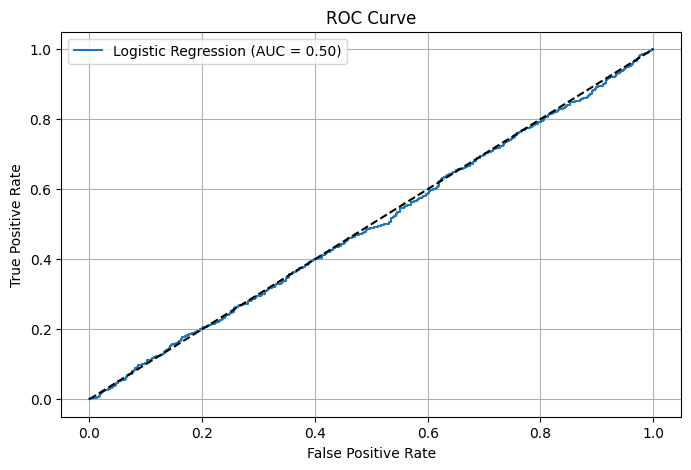

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

**2. Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree with class weights to handle imbalance
dt_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_dt = dt_classifier.predict(X_test)
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print(f"Decision Tree ROC-AUC Score: {roc_auc_score(y_test, y_prob_dt):.4f}")

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.27      0.27       716
           1       0.69      0.71      0.70      1684

    accuracy                           0.57      2400
   macro avg       0.49      0.49      0.49      2400
weighted avg       0.57      0.57      0.57      2400

Decision Tree ROC-AUC Score: 0.4860


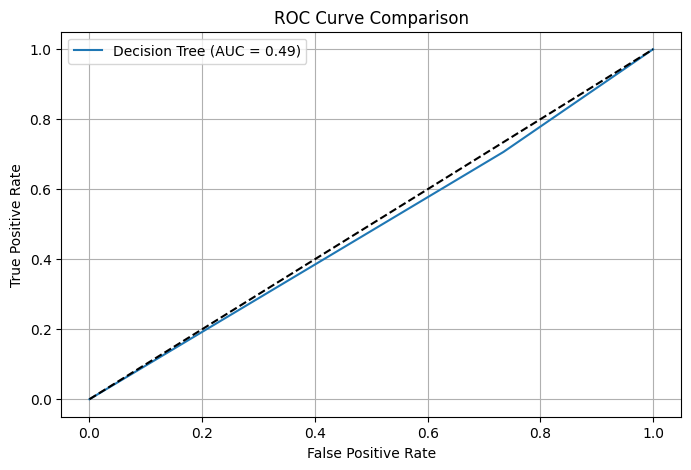

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

**3. Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with class weight
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, y_prob_rf):.4f}")

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.00      0.01       716
           1       0.70      1.00      0.82      1684

    accuracy                           0.70      2400
   macro avg       0.49      0.50      0.42      2400
weighted avg       0.57      0.70      0.58      2400

Random Forest ROC-AUC Score: 0.4856


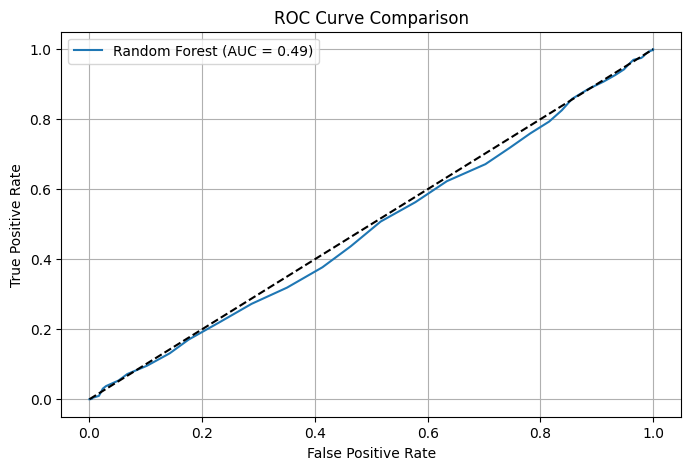

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()